Firsly, I consider a round chestnut bun with a shape of <b>sphear</b> with radius <b>R</b> (example as the image below). I also assume when 2,3,4… chestnut buns combined, it can be "rearranged" into a sphear (with its respectively radius).I sprinkled “Byevine" on it, the object will double every 5 minutes, which means <b>the volumn will be doubled every 5 minutes</b>. Now, start with <b>1</b> chestnut. The volumn of all chestnut bun after <b>t minutes</b>:<br>
<img src="chestnut_bun.jpg"/><br><br><br>
<img src="1.JPG"/><br><br>
Starting with 1 bun of radius <b>R</b>:<br><br>
<img src="2.JPG"/><br><br>


<h2>1. How long will it take to cover the solar system with chestnut buns?</h2>
From the image of chestnut bun above (the one I found most tasty for myself :D). I expect the diameter of this bus is 10cm or <b>its radius is 5cm</b>.<br>
Then, I googled the solar system radius. It turns out <b>4.5 billions of kilometers</b>.<br>
<img src="solar.JPG"/><br><br>
I also assume "cover the solar system with chestnut buns" where "cover" means fill the whole space as a sphere with radius of 4.5 bill. km.
Let radius of solar system is R_s. Then from the equation above:
<img src="3.JPG"/><br><br>


In [62]:
import math # for logarithmic funtion
BUNS_RADIUS = 5 #in centimeters
SOLAR_SYSTEM_RADIUS = 4.5e+12 #in cm
def chestnut_bun_cover_solar_system():
    """
    A function that calculate when the chestnut bun will cover the solar system.
    Note: This function is not generic, it is only apply to specific bun's radius and only for solar system
    --------------
    Returns
    --------------
    hour_covered: int
        The number of hour will cover the solar system
    """
    hour_covered = 5*math.log(math.pow(SOLAR_SYSTEM_RADIUS/BUNS_RADIUS,3),2) / (60) #Also convert minute to hour
    return hour_covered

In [63]:
print("After {} hours, chestnut buns will cover the solar system".format(chestnut_bun_cover_solar_system()))

After 9.927783511300824 hours, chestnut buns will cover the solar system


<h2> 2.A generic program that can be applied to other situations </h2>
For best ease of computing. I consider we have known the volumn of that space before or chestnut bun will cover a space which is a <b>sphear</b>, and we can input its radius.<br>
This program allow a generic buns, also.<br>
Note: If input the space volume, we can calculate time (in minute) by: <br>
<img src="4.JPG"/><br><br>

In [64]:
from math import * # for logarithmic funtion
import matplotlib.pyplot as plt # for plot
def chestnut_bun_cover_a_space(bun_radius, space_volume = -1, space_radius = -1):
    """
    A function that calculate time of a generic space that will be coverd by a certain type of chestnut bun
    --------------
    bun_radius : float
        The radius of a generic chestnut bun (in cm) which is sprinkled with vine
    space_volume : float (default = -1)
        The volumn (in cm^3) of the space to be covered
    space_radius : float (default = -1)
        Other option when you only know the space with its radius, this space must be in sphear shape.
    Note: If you input both volume and radius. It is preferred volume for calcualtion.
    Returns
    --------------
    hour_covered: int
        The number of hour will cover that space
    """
    PERIOD_DOUBLE = 5 # After 5 min, bun will doubled
    hour_covered = 0
    if space_volume == -1 and space_radius == -1:
        print("Please enter the space volume or radius!")
    if space_volume != -1:
        hour_covered = 5*log(space_volume * (3/(4*pi*pow(bun_radius,3))),2) / 60
    if space_radius != -1:
        hour_covered = 5*log(pow(space_radius/bun_radius,3),2) / 60 #Also convert minute to hour

    # Although I use some calculation to direct return the result, but when ploting I approach with for statement to show the change in volume
    current_bun_volume = 4/3 * pi * pow(bun_radius,3)
    list_current_volume = [current_bun_volume]
    list_time_change = [0]
    space_volume_to_stop = 4/3 * pi * pow(space_radius,3) if space_volume == -1 else space_volume
    while current_bun_volume < space_volume_to_stop:
        current_bun_volume *= 2
        list_current_volume.append(current_bun_volume)
        list_time_change.append(list_time_change[-1] + PERIOD_DOUBLE)

    # Plot the volumn of chestnut bun compared to the space

    fig, ax = plt.subplots()
    plt.title("Change of Chestnut bun compared to that Space")
    plt.xlabel("Number of minutes after sprinkle")
    plt.ylabel("Volume of chestnut bun (cm3)")
    ax.plot(list_time_change,list_current_volume,'.-', color='#0062ff',label="Volume of chestnut bun")
    ax.plot(list_time_change,list(space_volume_to_stop for i in range(len(list_current_volume))),'--', color='#fc0313', label = "Volume of Space")
    legend = ax.legend()
    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('#bafcff')

    return hour_covered

<img src="dome.JPG"/><br><br>
<img src="alpha.JPG"/><br><br>

After 2.675578635875778 hours, chestnut buns will cover Tokyo Dome


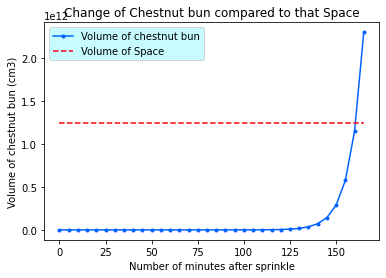

In [65]:
TOKYO_DOME_VOLUME = 1.24e12 #1 m^3 = 10^6 cm^3
print("After {} hours, chestnut buns will cover Tokyo Dome".format(chestnut_bun_cover_a_space(4,space_volume=TOKYO_DOME_VOLUME)))

After 6.9161968279816595 hours, chestnut buns will cover Alpha Centauri A


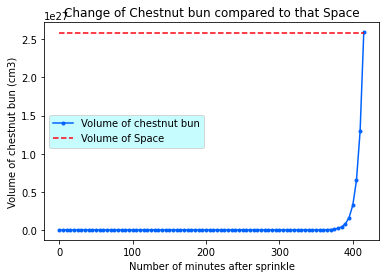

In [66]:
ALPHA_CENTAURI_A_RADIUS = 851120000 # in cm
print("After {} hours, chestnut buns will cover Alpha Centauri A".format(chestnut_bun_cover_a_space(4,space_radius=ALPHA_CENTAURI_A_RADIUS)))